In [0]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [93]:
# importing the data set
df = pd.read_csv('train_data.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Checking whether missing values exists

df.info()

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:
# Replacing 3+ with 3 because algorithm does not recognize 3

df['Dependents'].replace('3+', '3', inplace = True)

In [6]:
#Handling missing values

# We will replace the missing values in categorical variable by most frequent value

# We wil replace the missing values in numerical variable by mean of its column
value = df['Gender'].value_counts().idxmax()

df['Gender'].replace(np.nan, value, inplace = True)


value2 = df['Married'].value_counts().idxmax()

df['Married'].replace(np.nan, value2, inplace = True)


value3 = df['Self_Employed'].value_counts().idxmax()

df['Self_Employed'].replace(np.nan, value3, inplace = True)


value4 = df['LoanAmount'].mean()

df['LoanAmount'].replace(np.nan, value4, inplace = True)
#Handling missing values
value5 = df['Loan_Amount_Term'].mean()

df['Loan_Amount_Term'].replace(np.nan, value5, inplace = True)

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [0]:
#Handling missing values
value6 = df['Dependents'].value_counts().idxmax()

df['Dependents'].replace(np.nan, value6, inplace = True)


value7 = df['Credit_History'].value_counts().idxmax()

df['Credit_History'].replace(np.nan, value7, inplace = True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# Converting the categorical variable type to category

df['Gender'] = df['Gender'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')
df['Loan_Status'] = df['Loan_Status'].astype('category')
df.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents             object
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object

In [11]:
# Converting the categorical variable to 1 and 0
df['Gender'] = df['Gender'].cat.codes
df['Married'] = df['Married'].cat.codes
df['Education'] = df['Education'].cat.codes
df['Self_Employed'] = df['Self_Employed'].cat.codes
df['Property_Area'] = df['Property_Area'].cat.codes
df['Loan_Status'] = df['Loan_Status'].cat.codes
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [0]:
df['Credit_History'] = df['Credit_History'].astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int8   
 2   Married            614 non-null    int8   
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int8   
 5   Self_Employed      614 non-null    int8   
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    int8   
 12  Loan_Status        614 non-null    int8   
dtypes: float64(3), int64(1), int8(6), object(3)
memory usage: 37.3+ KB


In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [15]:
# Splitting the data into train and test set

from sklearn.model_selection import train_test_split

X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)

Y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 154
number of training samples: 460


In [0]:
# Implementing logistic regression

from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C=0.01)

LR_model.fit(X_train, y_train)

pred = LR_model.predict(X_test)

In [17]:
# finding accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred, normalize = True)*100)

67.53246753246754


In [18]:
# Implementing 5-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False)
LR_model1 = LogisticRegression(C=0.01)
accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # Train the model
    model = LR_model1.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)

              

68.56590697054511


In [19]:
# Implementing Support vector classifier

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# Finding accuracy

y_pred = svclassifier.predict(X_test)

print(accuracy_score(y_test, y_pred, normalize = True)*100)

79.50819672131148


In [21]:
# Implementing 5-fold cross validation

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False)
svc_classifier = SVC(kernel = 'linear')
accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # Train the model
    model = svc_classifier.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)


79.47887511662002


In [22]:
# implementing Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# Predicting the result
PredTree = Tree.predict(X_test)

print(accuracy_score(y_test, PredTree, normalize=True)*100)

81.14754098360656


In [24]:
# Implementing 5-fold cross validation

kf = KFold(n_splits=5,shuffle=False)

accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # Train the model
    model = Tree.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)

80.13194722111157


In [0]:
# Implementing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=600)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [26]:
# Finding accuracy

print(accuracy_score(y_test, y_pred, normalize=True)*100)

80.32786885245902


In [28]:
# Implementing 5-fold cross validation

kf = KFold(n_splits=5,shuffle=False)

accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)

78.83113421298148


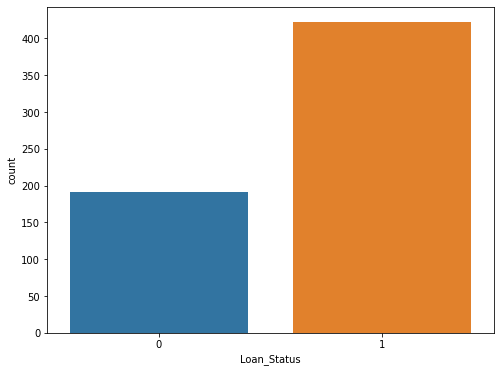

In [29]:
# Now lets do some feature selection by visualization
# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

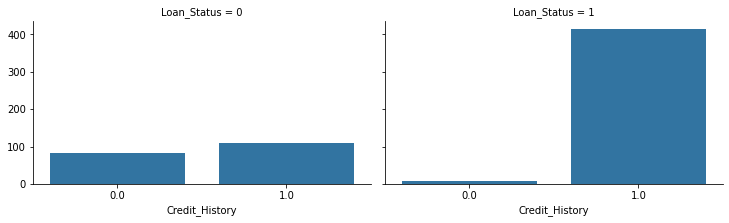

In [30]:
# First lets viualize the categorical data

# Credit_History

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

# This is a good feature because if you have Credit_History as 1 then there is a good chance that loan will be granted
# If your credit_history is 0 then you will not be granted a loan for sure

# Excellent Feature

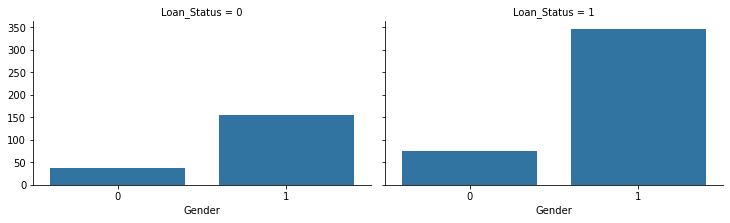

In [31]:
# Gender

# 1 is Male
# 0 is Female
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

# Males have higher chances of getting loan compared to female
# So this is also a good feature

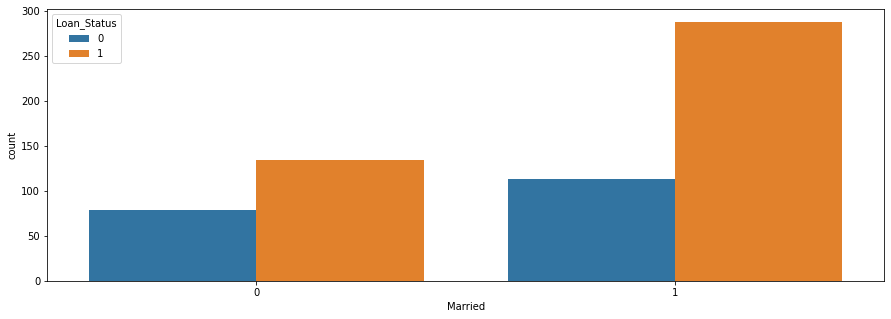

In [32]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);

# Married people are going to have more loan approval than unmarried

# So this is also a good feature


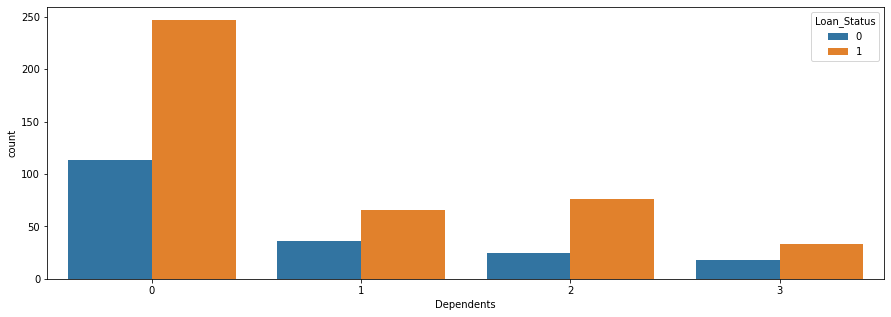

In [33]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

# A person with zero dependents has higher chances of loan to get approved

# It is also a good feature


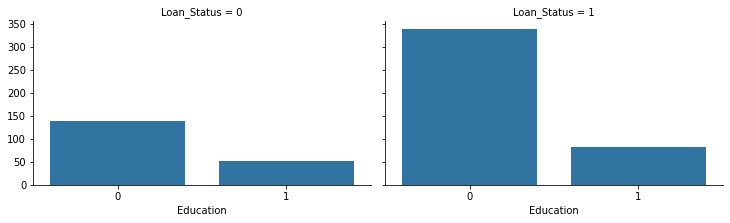

In [34]:
# Education
# 0 is graduated

# 1 is not graduated

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

# Graduated has a little more chances of loan to be approved than non-graduated

# Moderate feature

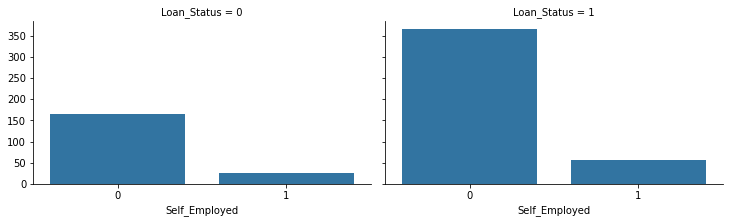

In [35]:
 # Self_Employed
# 0 is not self_employed

# 1 is self_employed

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

# Those who are not self_employed have moderate chances to get a loan from the bank

# Moderate feature

# We will drop this feature and all other moderate feature and will see its effect on accuracy


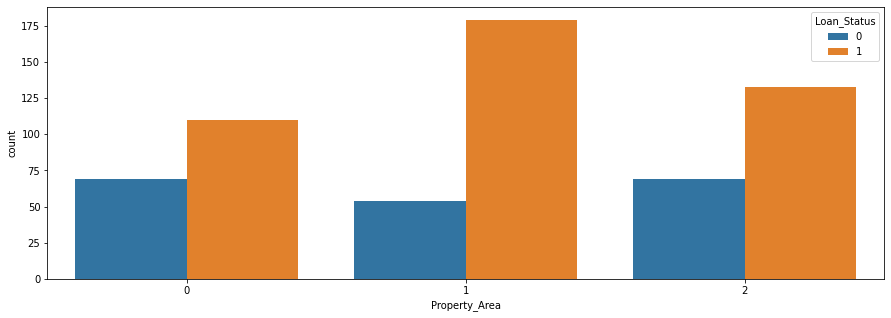

In [36]:
# Property_Area
# 2 is Urban
# 1 is semi urban
# 0 is Rural

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

# Semi_urban area has more than chances to get their loan approved than Urban and Rural Areas

# good feature

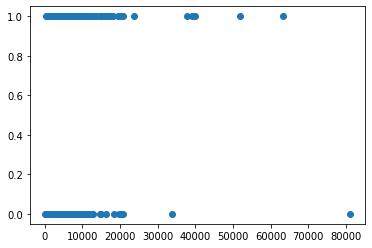

In [37]:
# Now lets visualize the continous varialbe. Here we will detect outliers if any

# ApplicantIncome

plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

# There is no obvious pattern

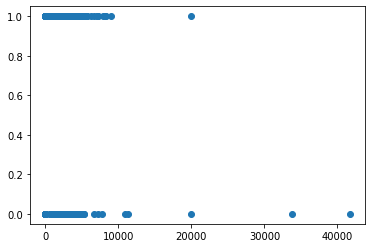

In [38]:

# CoApplicantIncome

plt.scatter(df['CoapplicantIncome'], df['Loan_Status']);

# There is no obvious pattern as well

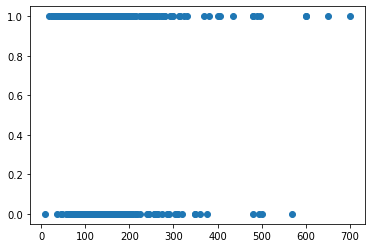

In [39]:

# LoanAmount

plt.scatter(df['LoanAmount'], df['Loan_Status']);

# There is no obvious pattern as well

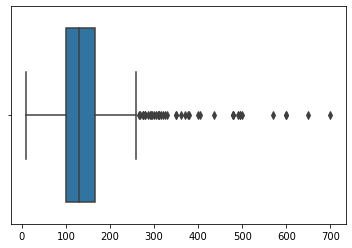

In [40]:
# Now lets detect outliers if any in the continous variables

# LoanAmount

sns.boxplot(df['LoanAmount']);
plt.title('', fontsize=15);
plt.xlabel('');

# We can see there are a lot of outliers

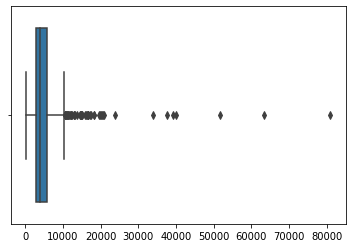

In [41]:
# CoApplicatnIncome
sns.boxplot(df['ApplicantIncome']);
plt.title('', fontsize=15);
plt.xlabel('');

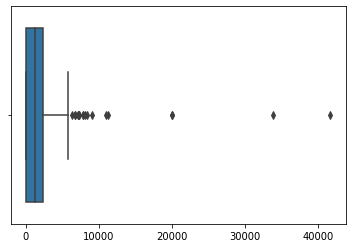

In [42]:
# CoApplicatnIncome
sns.boxplot(df['CoapplicantIncome']);
plt.title('', fontsize=15);
plt.xlabel('');

In [69]:
# Now lets remove outliers from continous data

threshold = 1.5
            
Loan_Amount_out = df['LoanAmount']
q25, q75 = np.percentile(Loan_Amount_out, 25), np.percentile(Loan_Amount_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in Loan_Amount_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = df
print('\nlen Data Frame before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['LoanAmount'] > upper) | (data_outliers['LoanAmount'] < lower)].index)

print('len Data Frame after dropping the outliers', len(data_outliers))

Quartile 25: 100.25 , Quartile 75: 164.75
iqr: 64.5
Cut Off: 96.75
Lower: 3.5
Upper: 261.5
Nubers of Outliers: 41
outliers:[267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]

len Data Frame before dropping the outliers 614
len Data Frame after dropping the outliers 573


In [70]:
# Now lets remove outliers from continous data

threshold = 1.5
            
Income_out = df['ApplicantIncome']
q25, q75 = np.percentile(Income_out, 25), np.percentile(Income_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in Income_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

print('\nlen Data Frame before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['ApplicantIncome'] > upper) | (data_outliers['ApplicantIncome'] < lower)].index)

print('len Data Frame after dropping the outliers', len(data_outliers))

Quartile 25: 2877.5 , Quartile 75: 5795.0
iqr: 2917.5
Cut Off: 4376.25
Lower: -1498.75
Upper: 10171.25
Nubers of Outliers: 50
outliers:[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]

len Data Frame before dropping the outliers 573
len Data Frame after dropping the outliers 545


In [71]:
data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            545 non-null    object 
 1   Gender             545 non-null    int8   
 2   Married            545 non-null    int8   
 3   Dependents         545 non-null    object 
 4   Education          545 non-null    int8   
 5   Self_Employed      545 non-null    int8   
 6   ApplicantIncome    545 non-null    int64  
 7   CoapplicantIncome  545 non-null    float64
 8   LoanAmount         545 non-null    float64
 9   Loan_Amount_Term   545 non-null    float64
 10  Credit_History     545 non-null    object 
 11  Property_Area      545 non-null    int8   
 12  Loan_Status        545 non-null    int8   
dtypes: float64(3), int64(1), int8(6), object(3)
memory usage: 37.3+ KB


In [72]:
data_outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [77]:
# Splitting the data into train and test set after doing feature selection

from sklearn.model_selection import train_test_split

X = data_outliers.drop(['Loan_ID', 'Loan_Status', 'Education', 'Self_Employed'], axis=1)

Y = data_outliers['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 137
number of training samples: 408


In [0]:
# Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C=0.01)

LR_model.fit(X_train, y_train)

pred = LR_model.predict(X_test)

In [79]:
# finding accuracy
print(accuracy_score(y_test, pred, normalize = True)*100)

70.8029197080292


In [83]:
# Implementing 5-fold cross validation

kf = KFold(n_splits=5,shuffle=False)
LR_model1 = LogisticRegression(C=0.01)
accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Train the model
    model = LR_model1.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)

69.35779816513761


In [84]:
#Implementing Decsion Tree Classifier
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
# Finding accuracy

PredTree = Tree.predict(X_test)

print(accuracy_score(y_test, PredTree, normalize=True)*100)

80.73394495412845


In [87]:
# Implementing 5-fold cross validation
kf = KFold(n_splits=5,shuffle=False)

accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Train the model
    model = Tree.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)

80.0


In [0]:
#Implementing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=600)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [89]:
# Finding accuracy
print(accuracy_score(y_test, y_pred, normalize=True)*100)

81.65137614678899


In [90]:
# Implementing 5-fold cross validation
kf = KFold(n_splits=5,shuffle=False)

accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)

80.0


In [91]:
# Implementing Support vector classifier

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
y_pred = svclassifier.predict(X_test)

print(accuracy_score(y_test, y_pred, normalize = True)*100)

80.73394495412845


In [95]:
#Implementing 5-fold cross validation

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False)
svc_classifier = SVC(kernel = 'linear')
accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Train the model
    model = svc_classifier.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)

81.4678899082569


In [97]:
# Now lets try to improve the model by tuning the hyperparameter
# Trying different parameters
arr = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
accuracy = []
for n in arr:
  LR_model = LogisticRegression(C=n)

  LR_model.fit(X_train, y_train)

  pred = LR_model.predict(X_test)
  
  accuracy.append(accuracy_score(y_test, pred, normalize=True)*100)


print(accuracy)

# so with C = 0.5 we have improved our accuracy 

[66.97247706422019, 81.65137614678899, 81.65137614678899, 82.56880733944955, 82.56880733944955, 82.56880733944955, 82.56880733944955, 82.56880733944955]


In [102]:
# 5-fold cross validation with best hyperparameter
 
kf = KFold(n_splits=5,shuffle=False)
LR_model1 = LogisticRegression(C=0.5)
accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Train the model
    model = LR_model1.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)

81.65137614678899


In [101]:
#Trying different numbers of trees

arr1 = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1300, 1500]
accuracy1 = []
for n in arr1:
  clf=RandomForestClassifier(n_estimators=n)

#Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(X_train,y_train)

  y_pred=clf.predict(X_test)
  
  accuracy1.append(accuracy_score(y_test, y_pred, normalize= True)*100)

print(accuracy1)

# It is giving optimal accuracy with 400 trees


[66.97247706422019, 82.56880733944955, 82.56880733944955, 82.56880733944955, 81.65137614678899, 80.73394495412845]


In [105]:
# 5-fold cross validation with 400 trees

kf = KFold(n_splits=5,shuffle=False)
clf1 = RandomForestClassifier(n_estimators=400)
accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Train the model
    model = clf1.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)

80.55045871559633


In [104]:
# Trying different hyperparameters
arr2 = [0.01, 0.1, 0.3, 0.6, 0.8, 1]
accuracy2 = []
for n in arr2:
  svclassifier = SVC(C=n, kernel='linear')
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)
  accuracy2.append(accuracy_score(y_test, y_pred, normalize=True)*100)


print(accuracy2)  


# It is giving optimal accuracy with n=0.1

[66.97247706422019, 82.56880733944955, 82.56880733944955, 82.56880733944955, 81.65137614678899, 80.73394495412845]


In [107]:
# 5-fold cross validation with best hyperparameter

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False)
svc_classifier = SVC(C = 0.1, kernel = 'linear')
accuracy_model = []

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Train the model
    model = svc_classifier.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    


ave_accuracy = (accuracy_model[0]+accuracy_model[1]+accuracy_model[2]+accuracy_model[3]+accuracy_model[4])/5
print(ave_accuracy)



81.83486238532112
